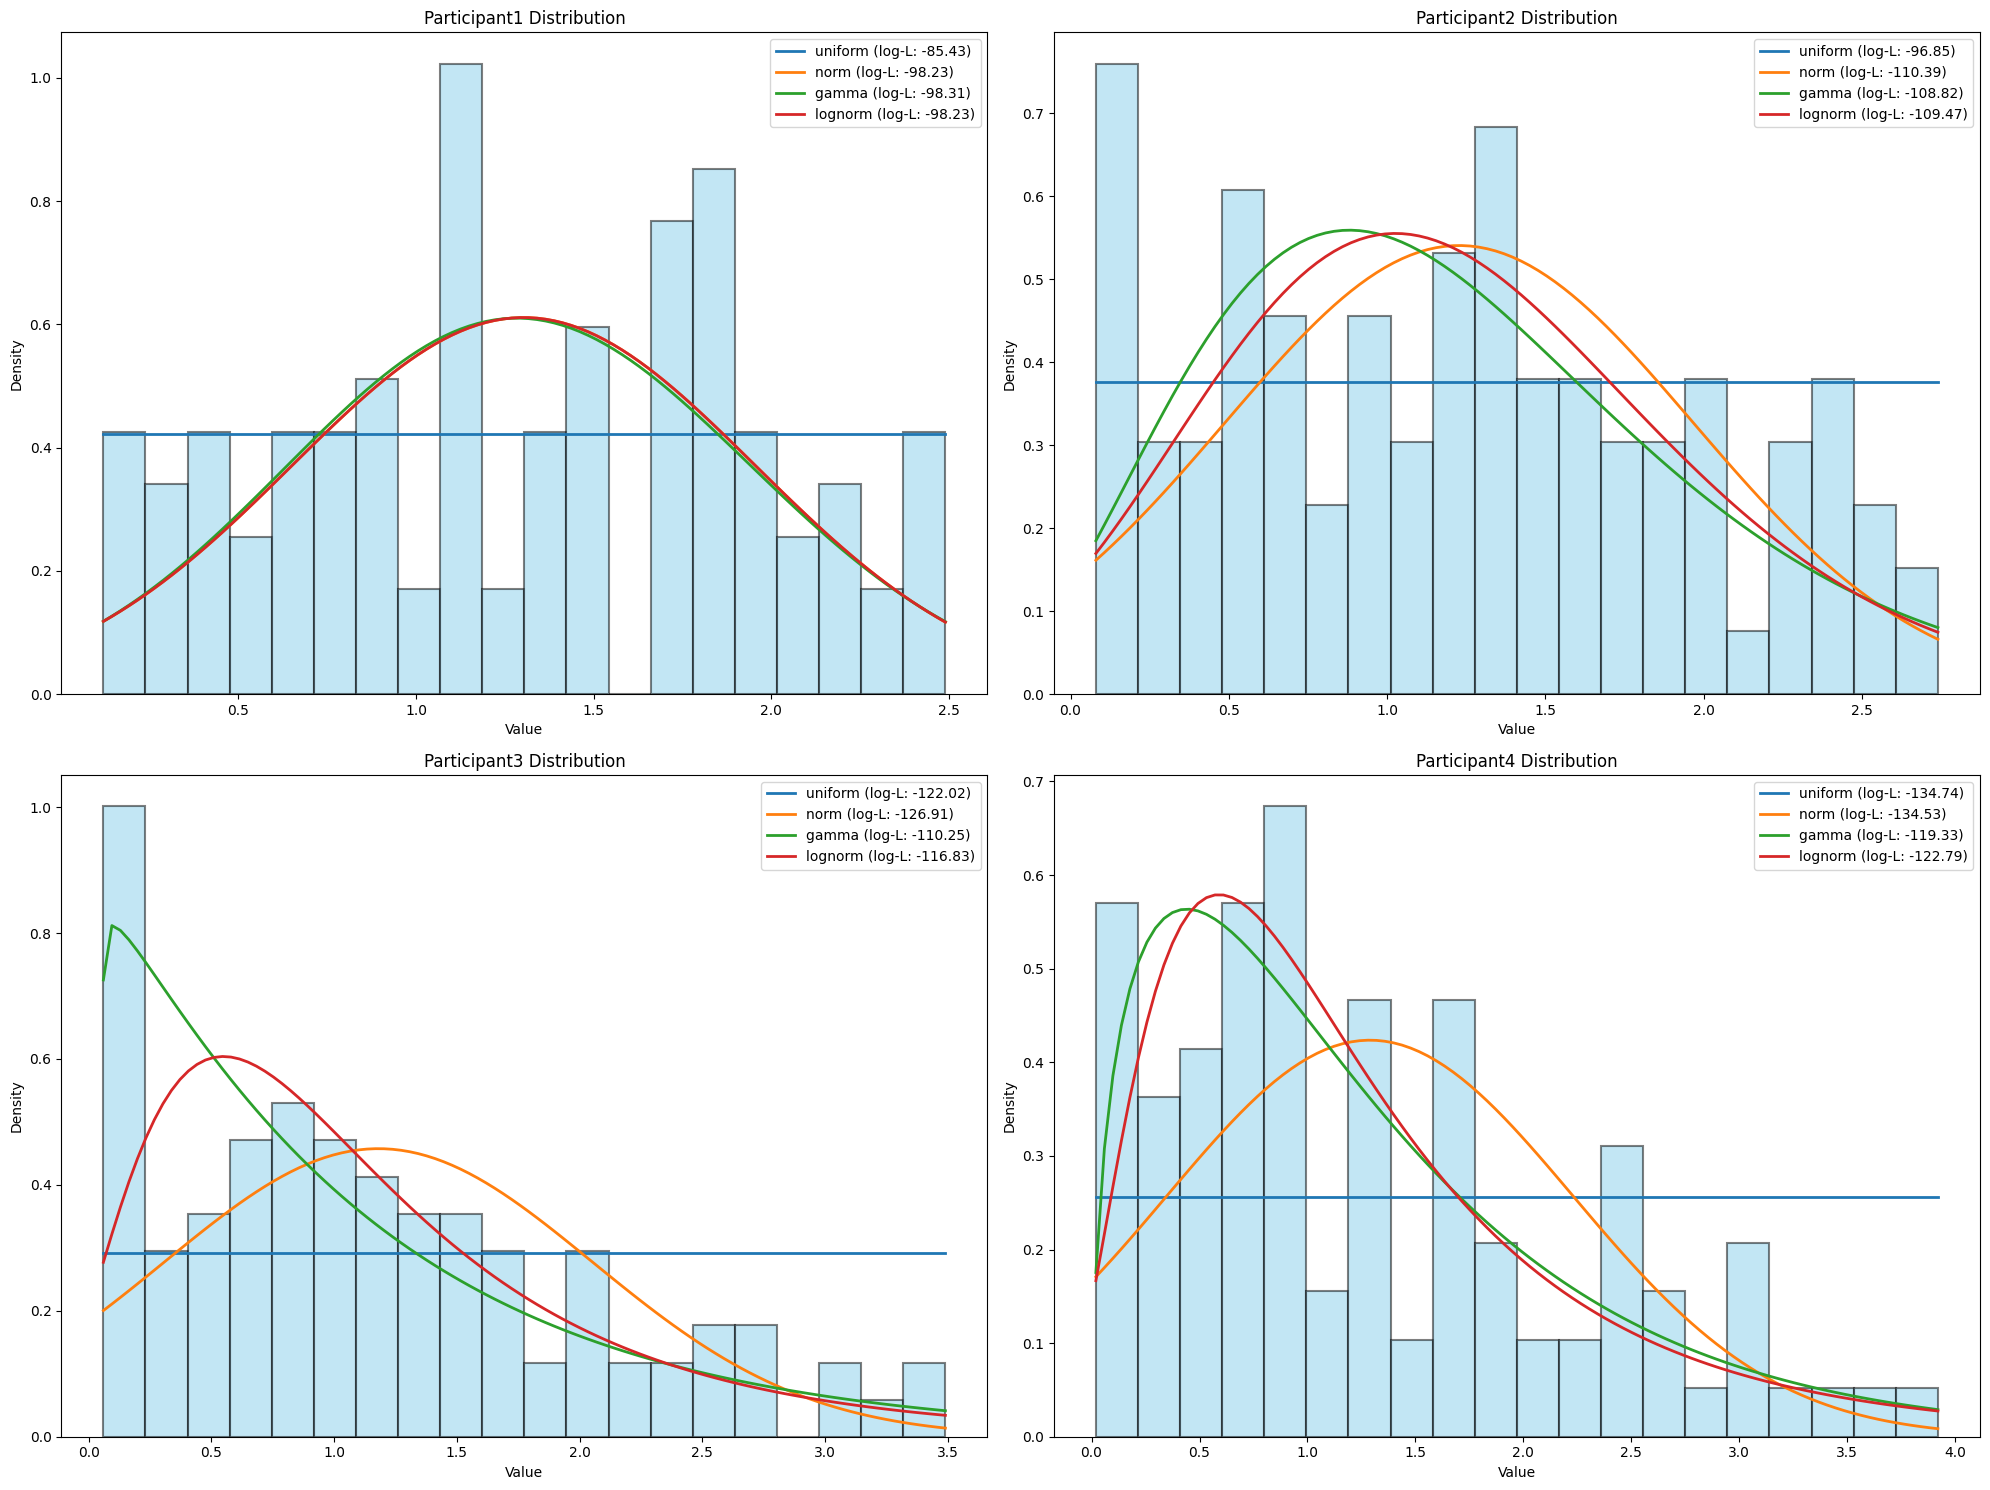


Participant1 distribution fitting results:
Distribution: uniform
Parameters: (np.float64(0.12), np.float64(2.37))
Log-likelihood: -85.42610555955694

Distribution: norm
Parameters: (np.float64(1.303030303030303), np.float64(0.6526642438829804))
Log-likelihood: -98.23236157426494

Distribution: lognorm
Parameters: (np.float64(1.991702713122946e-05), -32767.87999999997, np.float64(32769.18302380342))
Log-likelihood: -98.23243187675307

Distribution: gamma
Parameters: (np.float64(1207.9777089585227), np.float64(-21.42600570992815), np.float64(0.018815215098743607))
Log-likelihood: -98.30651112133785


Participant2 distribution fitting results:
Distribution: uniform
Parameters: (np.float64(0.08), np.float64(2.66))
Log-likelihood: -96.85428615656713

Distribution: gamma
Parameters: (np.float64(5.046337941379537), np.float64(-0.5252401149765062), np.float64(0.34750975145734364))
Log-likelihood: -108.81850258200569

Distribution: lognorm
Parameters: (np.float64(0.18554248695196), -2.78069838

In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import stats  

# Read data  
df = pd.read_csv('data2.csv')  
df.columns = ['Participant1', 'Participant2', 'Participant3', 'Participant4']  

# Define the distributions to test  
distributions = [  
    stats.uniform,   # Uniform distribution  
    stats.norm,      # Normal distribution  
    stats.gamma,     # Gamma distribution  
    stats.lognorm,   # Log-normal distribution  
]  

# Create figure  
plt.figure(figsize=(20, 15))  

# Store the distribution fitting results for each participant  
all_results = {}  

# Analyze for each participant  
for i, participant in enumerate(['Participant1', 'Participant2', 'Participant3', 'Participant4'], 1):  
    data = df[participant]  
    
    # Create a subplot  
    plt.subplot(2, 2, i)  
    
    # Plot the histogram without overlap  
    plt.hist(data, bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black', linewidth=1.5)  # Set alpha to 0.5 for transparency  
    plt.title(f'{participant} Distribution')  
    plt.xlabel('Value')  
    plt.ylabel('Density')  
    
    # Store current participant's distribution fitting results  
    participant_results = []  
    
    # Fit each distribution  
    for dist in distributions:  
        try:  
            # Maximum likelihood estimation parameters  
            if dist == stats.uniform:  
                # For uniform distribution, use the min and max of the data  
                params = (data.min(), data.max() - data.min())  
                # Calculate the log likelihood for the uniform distribution  
                log_likelihood = np.sum(dist.logpdf(data, params[0], params[1]))  
            else:  
                # Use scipy's fit method for other distributions  
                params = dist.fit(data)  
                # Calculate the log likelihood  
                log_likelihood = np.sum(dist.logpdf(data, *params[:-2], loc=params[-2], scale=params[-1]))  
            
            # Store results  
            participant_results.append({  
                'distribution': dist.name,  
                'params': params,  
                'log_likelihood': log_likelihood  
            })  
            
            # Plot the fitted probability density function  
            x = np.linspace(data.min(), data.max(), 100)  
            if dist == stats.uniform:  
                pdf = dist.pdf(x, params[0], params[1])  
            else:  
                pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])  
            plt.plot(x, pdf, label=f'{dist.name} (log-L: {log_likelihood:.2f})', linewidth=2)  
        
        except Exception as e:  
            print(f"Error fitting {dist.name} for {participant}: {e}")  

    # Sort by log likelihood  
    participant_results.sort(key=lambda x: x['log_likelihood'], reverse=True)  
    
    # Store results  
    all_results[participant] = participant_results  
    
    plt.legend()  

plt.tight_layout()  
plt.show()  

# Print detailed results  
for participant, results in all_results.items():  
    print(f"\n{participant} distribution fitting results:")  
    for result in results:  
        print(f"Distribution: {result['distribution']}")  
        print(f"Parameters: {result['params']}")  
        print(f"Log-likelihood: {result['log_likelihood']}\n")

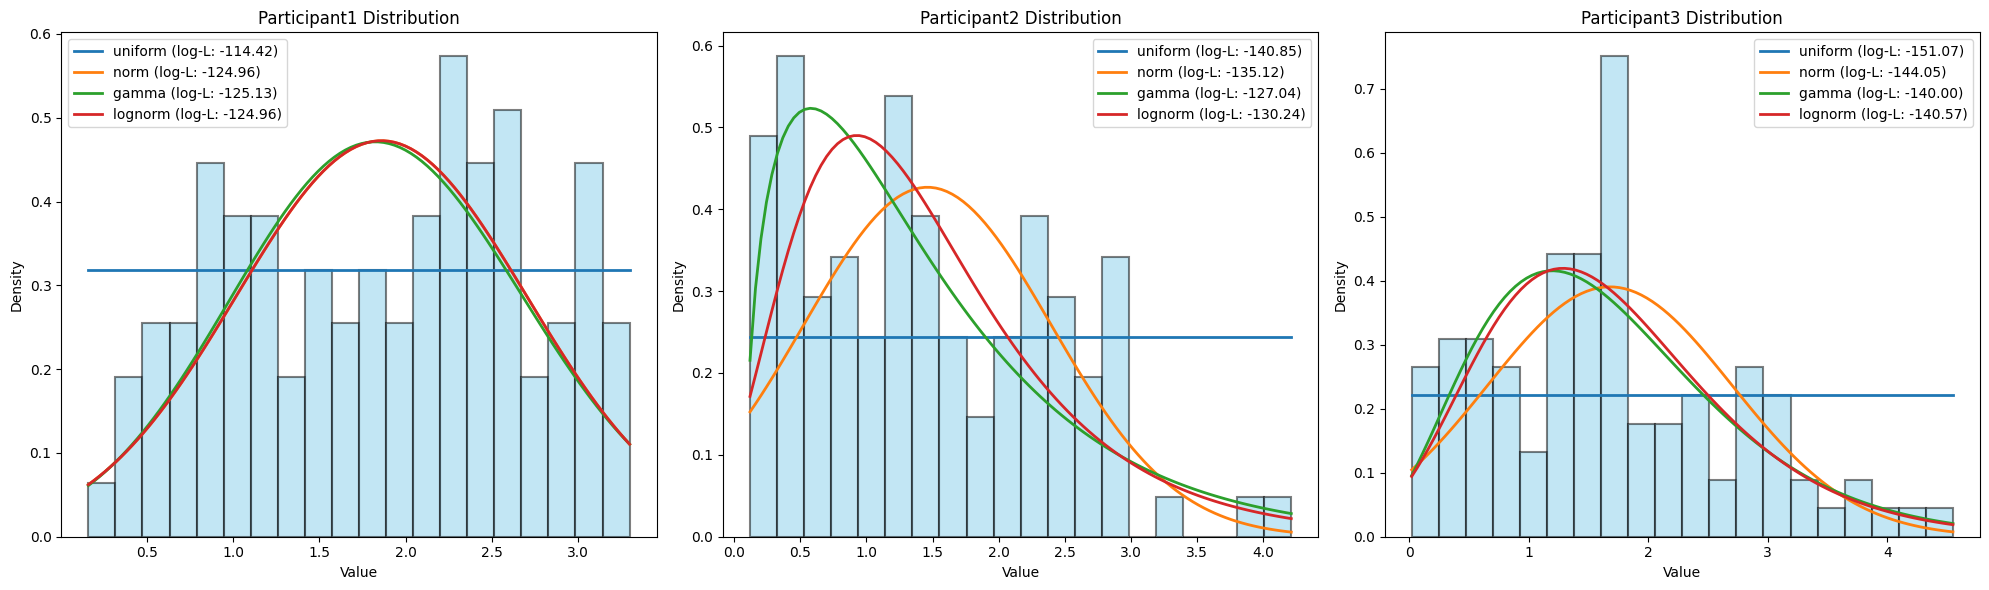


Participant1 distribution fitting results:
Distribution: uniform
Parameters: (np.float64(0.16), np.float64(3.1399999999999997))
Log-likelihood: -114.42227999201616

Distribution: norm
Parameters: (np.float64(1.8604999999999998), np.float64(0.8442053956236006))
Log-likelihood: -124.95790789549162

Distribution: lognorm
Parameters: (np.float64(2.5842855233672673e-05), -32665.0675908343, np.float64(32666.92807992592))
Log-likelihood: -124.95806161060813

Distribution: gamma
Parameters: (np.float64(593.2238073839685), np.float64(-18.774274640522215), np.float64(0.03478160668238191))
Log-likelihood: -125.1281474008891


Participant2 distribution fitting results:
Distribution: gamma
Parameters: (np.float64(1.5681358204752662), np.float64(0.0779437584081871), np.float64(0.881891579236102))
Log-likelihood: -127.04393450056386

Distribution: lognorm
Parameters: (np.float64(0.4228782514073064), -0.8334202659981661, np.float64(2.1046206802585252))
Log-likelihood: -130.24028216024087

Distributio

In [37]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import stats  

# Read data  
df = pd.read_csv('data1.csv')  
df.columns = ['Participant1', 'Participant2', 'Participant3']  

# Define the distributions to test (removed beta distribution)  
distributions = [  
    stats.uniform,   # Uniform distribution  
    stats.norm,      # Normal distribution  
    stats.gamma,     # Gamma distribution  
    stats.lognorm,   # Log-normal distribution  
]  

# Create figure  
plt.figure(figsize=(20, 6))  

# Store the distribution fitting results for each participant  
all_results = {}  

# Analyze for each participant  
for i, participant in enumerate(['Participant1', 'Participant2', 'Participant3'], 1):  
    data = df[participant]  
    
    # Create a subplot  
    plt.subplot(1, 3, i)  
    
    # Plot the histogram without overlap  
    plt.hist(data, bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black', linewidth=1.5)  
    plt.title(f'{participant} Distribution')  
    plt.xlabel('Value')  
    plt.ylabel('Density')  
    
    # Store current participant's distribution fitting results  
    participant_results = []  
    
    # Fit each distribution  
    for dist in distributions:  
        try:  
            # Maximum likelihood estimation parameters  
            if dist == stats.uniform:  
                # For uniform distribution, use the min and max of the data  
                params = (data.min(), data.max() - data.min())  
                # Calculate the log likelihood for the uniform distribution  
                log_likelihood = np.sum(dist.logpdf(data, params[0], params[1]))  
            else:  
                # Use scipy's fit method for other distributions  
                params = dist.fit(data)  
                # Calculate the log likelihood  
                log_likelihood = np.sum(dist.logpdf(data, *params[:-2], loc=params[-2], scale=params[-1]))  
            
            # Store results  
            participant_results.append({  
                'distribution': dist.name,  
                'params': params,  
                'log_likelihood': log_likelihood  
            })  
            
            # Plot the fitted probability density function  
            x = np.linspace(data.min(), data.max(), 100)  
            pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])  
            plt.plot(x, pdf, label=f'{dist.name} (log-L: {log_likelihood:.2f})', linewidth=2)  
        
        except Exception as e:  
            print(f"Error fitting {dist.name} for {participant}: {e}")  

    # Sort by log likelihood  
    participant_results.sort(key=lambda x: x['log_likelihood'], reverse=True)  
    
    # Store results  
    all_results[participant] = participant_results  
    
    plt.legend()  

plt.tight_layout()  
plt.show()  

# Print detailed results  
for participant, results in all_results.items():  
    print(f"\n{participant} distribution fitting results:")  
    for result in results:  
        print(f"Distribution: {result['distribution']}")  
        print(f"Parameters: {result['params']}")  
        print(f"Log-likelihood: {result['log_likelihood']}\n")

